In [15]:
import matplotlib.pyplot as plt

from scipy import linalg as lin
from scipy.optimize import fsolve, leastsq
import numpy as np
import pandas as pd
from scipy.integrate import quad
import pandas as pd
import time 

# Задание 2.1

In [2]:
'''Задание 2'''
def equations(p):
    return (np.exp(-2*p) - 2*p + 1)
def sistem_equations(p):
        x, y = p
        return (np.cos(x-1) + y - 0.5, x - np.cos(y) - 3)
def task2_1():
    print('Уравнение: ')
    x0 = fsolve(equations, 1)
    print('x =', *x0)
    x1, y1 = fsolve(sistem_equations, (1,1))
    print('x =', x1, ' y =', y1)

    print('\n')

In [3]:
task2_1()

Уравнение: 
x = 0.6392322713805392
x = 3.3559117388279  y = 1.2069068175160218




# Задание 2.2.1

In [4]:
def func(params, x):
        return params[0] * x + params[1]

def err_func(params, x, y):
        return y - func(params, x)
def plot(x, y, a, b):
    plt.scatter(x, y, c='cyan')
    plt.plot(x, x * a + b)
    plt.show()
def task2_2_1():
    x = np.array([20, 22, 24, 26, 28])
    y = np.array([40, 30.2, 22.8, 17.3, 13.1])

    params0 = np.array([0, 0])

    params0, tmp = leastsq(err_func, params0, args=(x, y))
    a, b = params0[0], params0[1]
    print(b)
    print('R =', a, '* T +', b)

    print('R при температуре T = 21 : ', np.round(a * 21. + b, 2))

    for i in range(len(x)):
        print('ошибка при i=', i, ' err=', y[i] - x[i] * a - b)
    plot(x, y, a, b)


    print('\n')

104.72000010466114
R = -3.3350000043608805 * T + 104.72000010466114
R при температуре T = 21 :  34.69
ошибка при i= 0  err= 1.979999982556464
ошибка при i= 1  err= -1.1500000087217614
ошибка при i= 2  err= -1.8800000000000097
ошибка при i= 3  err= -0.7099999912782522
ошибка при i= 4  err= 1.7600000174435166


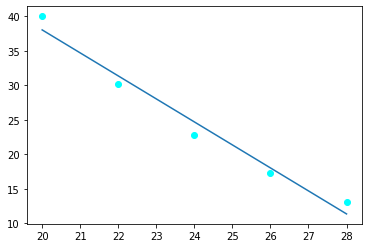

In [5]:
task2_2_1()

# Задание 2.2.2

In [6]:
def func2(params, x, N):
        return np.log(N) - params * x

def task2_2_2():
    print('Задание 2.2.2', sep='\n')
    x = np.array([0, 0.166016, 0.332032, 0.498048, 0.664064, 0.83008])
    y = np.array([1001490,  943249,  892300,  840016,  795713,  749189])
    N = y[0]

    def func(params, x, N):
        return np.log(N) - params * x

    def err_func(params, x, y):
        return np.log(y) - func(params, x, N)

    params0 = 0

    params0, tmp = leastsq(err_func, params0, args=(x, y))
    print(params0)
    print('N(t) = N(0) * e ^ ( -', np.round(*params0, 2), '* t )')
    print('T(1/2) =', *np.round(np.log(2) / params0, 2))

    for i in range(len(x)):
        print('ошибка при i =', i, ' err =', np.log(y[i]) - (np.log(N) - params0 * x[i]))

    plt.scatter(x, np.log(y), c='r')
    plt.plot(x, np.log(N) - params0 * x)
    plt.show()
    print('\n')

    params0 = 0

    params0, tmp = leastsq(err_func, params0, args=(x, y))
    print(params0)
    print('Результат ', 'N(t) = N(0) * e ^ ( -', np.round(*params0, 2), '* t )')
    print('T(1/2) =', *np.round(np.log(2) / params0, 2))

    for i in range(len(x)):
        print('ошибка при i =', i, ' err =', np.log(y[i]) - (np.log(N) - params0 * x[i]))

    plt.scatter(x, np.log(y), c='r')
    plt.plot(x, np.log(N) - params0 * x)
    plt.show()
    print('\n')

Задание 2.2.2
[0.34931506]
N(t) = N(0) * e ^ ( - 0.35 * t )
T(1/2) = 1.98
ошибка при i = 0  err = [0.]
ошибка при i = 1  err = [-0.00192198]
ошибка при i = 2  err = [0.00054201]
ошибка при i = 3  err = [-0.00184756]
ошибка при i = 4  err = [0.00196196]
ошибка при i = 5  err = [-0.00029343]


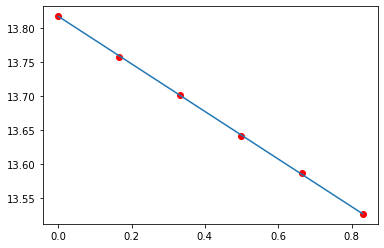



[0.34931506]
Результат  N(t) = N(0) * e ^ ( - 0.35 * t )
T(1/2) = 1.98
ошибка при i = 0  err = [0.]
ошибка при i = 1  err = [-0.00192198]
ошибка при i = 2  err = [0.00054201]
ошибка при i = 3  err = [-0.00184756]
ошибка при i = 4  err = [0.00196196]
ошибка при i = 5  err = [-0.00029343]


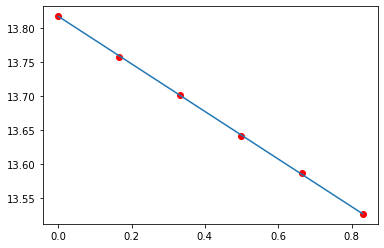

In [7]:
task2_2_2()

#  Задание  3.1

In [8]:
def task3_1():
    print('Задание 3.1', sep='\n')

    def SIR():
        s0 = 9000
        r0 = 0
        i0 = 1000
        y = 0.2
        b = 0.5
        sum = s0 + i0 + r0

        print('Люди которые могут заболеть:', int(s0))
        print('Люди которые здоровы:', int(r0))
        print('Люди которые больны:', int(i0))
        k = 0
        i = []
        r = []
        s = []

        i.append(int(i0))
        r.append(int(r0))
        s.append(int(s0))
        while 1:
            print('\n')

            s1, tmp1 = quad(func=lambda t: s0 - b * s0 * i0 / sum, a=0., b=1.)

            r1, tmp3 = quad(func=lambda t: (y * i0), a=0., b=1.)

            i1 = sum - s1 - r1 - r0

            i.append(int(i1))
            r.append(int(r1 + r0))
            s.append(int(s1))
            k += 1

            if ((int(i0) == 0) or (int(r0) == 0)) and k > 1:
                break
            print('Шаг ', k)
            print('Люди которые могут заболеть:', int(s1))
            print('Люди которые здоровы:', int(r1 + r0))
            print('Люди которые больны:', int(i1))
            s0 = s1
            i0 = i1
            r0 = r0 + r1
        return i, s, r

    i, s, r = SIR()

    data = {'Группа болеющих людей': i,
            'Группа людей, которые могут заболеть': s,
            'Группа здоровых людей': r}
    df = pd.DataFrame(data)
    plt.title('Модель SIR')
    plt.xlabel("время")
    plt.ylabel("количество людей")
    plt.plot(df)
    plt.legend(data, loc=1)
    plt.show()

Задание 3.1
Люди которые могут заболеть: 9000
Люди которые здоровы: 0
Люди которые больны: 1000


Шаг  1
Люди которые могут заболеть: 8550
Люди которые здоровы: 200
Люди которые больны: 1250


Шаг  2
Люди которые могут заболеть: 8015
Люди которые здоровы: 450
Люди которые больны: 1534


Шаг  3
Люди которые могут заболеть: 7400
Люди которые здоровы: 756
Люди которые больны: 1842


Шаг  4
Люди которые могут заболеть: 6718
Люди которые здоровы: 1125
Люди которые больны: 2155


Шаг  5
Люди которые могут заболеть: 5994
Люди которые здоровы: 1556
Люди которые больны: 2448


Шаг  6
Люди которые могут заболеть: 5260
Люди которые здоровы: 2046
Люди которые больны: 2693


Шаг  7
Люди которые могут заболеть: 4552
Люди которые здоровы: 2584
Люди которые больны: 2862


Шаг  8
Люди которые могут заболеть: 3900
Люди которые здоровы: 3157
Люди которые больны: 2941


Шаг  9
Люди которые могут заболеть: 3326
Люди которые здоровы: 3745
Люди которые больны: 2927


Шаг  10
Люди которые могут заболеть: 2840

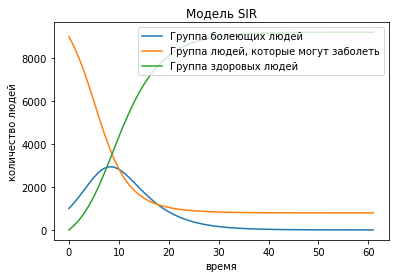

In [9]:
task3_1()

In [10]:
def task1_1():
    print('Задание 1.1',sep='\n')

    def odu2_1(koeffs, func, L, bcl, bcr, N):
        a, b = koeffs
        lalpha, lbeta, lgamma = bcl
        ralpha, rbeta, rgamma = bcr
        h = L / N

        Ad1 = np.ones(N)
        Al = np.ones(N + 1)
        Au1 = np.ones(N)

        Ad1[::] = 1 / h ** 2 - a / (2 * h)
        Al[::] = b - 2 / h ** 2
        Au1[::] = 1 / h ** 2 + a / (2 * h)
        F = np.fromfunction(func, (N + 1, 1))

        Al[0] = lbeta - lgamma / h
        Au1[0] = lgamma / h
        F[0] = lalpha

        Ad1[N - 1] = -rgamma / h
        Al[N] = rbeta + rgamma / h
        F[N] = ralpha

        A = np.diag(Ad1, -1) + np.diag(Al) + np.diag(Au1, 1)
        res = lin.solve(A, F)
        return res

    def odu2_2(koeffs, func, L, bcl, bcr, N):
        a, b = koeffs
        lalpha, lbeta, lgamma = bcl
        ralpha, rbeta, rgamma = bcr
        h = L / N

        Ad1 = np.zeros(N + 1)  # y[i-1]
        Al = np.ones(N + 1)  # y[i]
        Au1 = np.ones(N + 1)  # y[i+1]

        Ad1[::] = 1 / h ** 2 - a / (2 * h)
        Al[::] = b - 2 / h ** 2
        Au1[::] = 1 / h ** 2 + a / (2 * h)
        F = np.fromfunction(func, (N + 1, 1))

        Ad1[0] = 0
        Al[0] = lbeta - lgamma / h
        Au1[0] = lgamma / h
        F[0] = lalpha

        Ad1[N] = -rgamma / h
        Al[N] = rbeta + rgamma / h
        Au1[N] = 0
        F[N] = ralpha

        Ad1 = np.roll(Ad1, -1)
        Au1 = np.roll(Au1, 1)

        A = np.concatenate((Au1, Al, Ad1)).reshape(3, N + 1)

        res = lin.solve_banded((1, 1), A, F)
        return res

    L = np.pi

    N = 100
    start_time = time.time()
    u1_100 = odu2_1([0, 1], lambda x, y: -x * L / N, L, (0, 1, 0), (1, 0, 1), N)
    print('Время работы solve: ', time.time() - start_time)
    start_time = time.time()
    u2_100 = odu2_2([0, 1], lambda x, y: -x * L / N, L, (0, 1, 0), (1, 0, 1), N)
    print('Время работы solve_banded: ', time.time() - start_time)

    plt.figure()
    plt.subplot(121)
    plt.title("Решение функцией solve для размерности 100")
    plt.xlabel("размерность")
    plt.ylabel("решение")
    plt.plot(u1_100)

    plt.subplot(122)
    plt.title("Решение функцией solve_banded для размерности 100")
    plt.xlabel("размерность")
    plt.ylabel("решение")
    plt.plot(u2_100)
    plt.show()
    print('\n')

    N = 1000
    start_time = time.time()
    u1_1000 = odu2_1([0, 1], lambda x, y: -x * L / N, L, (0, 1, 0), (1, 0, 1), N)
    print('Время работы solve: ', time.time() - start_time)
    start_time = time.time()
    u2_1000 = odu2_2([0, 1], lambda x, y: -x * L / N, L, (0, 1, 0), (1, 0, 1), N)
    print('Время работы solve_banded: ', time.time() - start_time)

    plt.figure()
    plt.subplot(121)
    plt.title("Решение функцией solve для размерности 1000")
    plt.xlabel("размерность")
    plt.ylabel("решение")
    plt.plot(u1_1000)

    plt.subplot(122)
    plt.title("Решение функцией solve_banded для размерности 1000")
    plt.xlabel("размерность")
    plt.ylabel("решение")
    plt.plot(u2_1000)
    plt.show()
    print('\n')

    N = 10000
    start_time = time.time()
    u1_10000 = odu2_1([0, 1], lambda x, y: -x * L / N, L, (0, 1, 0), (1, 0, 1), N)
    print('Время работы solve: ', time.time() - start_time)
    start_time = time.time()
    u2_10000 = odu2_2([0, 1], lambda x, y: -x * L / N, L, (0, 1, 0), (1, 0, 1), N)
    print('Время работы solve_banded: ', time.time() - start_time)

    plt.figure()
    plt.subplot(121)
    plt.title("Решение функцией solve для размерности 10000")
    plt.xlabel("размерность")
    plt.ylabel("решение")
    plt.plot(u1_10000)

    plt.subplot(122)
    plt.title("Решение функцией solve_banded для размерности 10000")
    plt.xlabel("размерность")
    plt.ylabel("решение")
    plt.plot(u2_10000)
    plt.show()
    print('\n')

    u1_100_10000=np.array(abs(u1_100-u1_10000[0:len(u1_10000):100])).max()
    u2_100_10000 = np.array(abs(u2_100 - u2_10000[0:len(u2_10000):100])).max()
    u1_100_1000 = np.array(abs(u1_100 - u1_1000[0:len(u1_1000):10])).max()
    u2_100_1000 = np.array(abs(u2_100 - u2_1000[0:len(u2_1000):10])).max()
    u1_1000_10000 = np.array(abs(u1_1000 - u1_10000[0:len(u1_10000):10])).max()
    u2_1000_10000 = np.array(abs(u2_1000 - u2_10000[0:len(u2_10000):10])).max()
    print('Невязка для функции solve между размерностями 100 и 10000',np.round(u1_100_10000,5))
    print('Невязка для функции solve_banded между размерностями 100 и 10000', np.round(u2_100_10000,5))
    print('\n')
    print('Невязка для функции solve между размерностями 100 и 1000', np.round(u1_100_1000,5))
    print('Невязка для функции solve_banded между размерностями 100 и 1000', np.round(u2_100_1000,5))
    print('\n')
    print('Невязка для функции solve между размерностями 1000 и 10000', np.round(u1_1000_10000,6))
    print('Невязка для функции solve_banded между размерностями 1000 и 10000', np.round(u2_1000_10000,6))
    print('\n')

def task1_2():
    print('Задание 1.2',sep='\n')

    def odu4_1(koeffs, func, L, phi, psi, N):
        a4, a3, a2, a1, a0 = koeffs
        lphi, rphi = phi
        lpsi, rpsi = psi
        h = L / N

        Ad2 = np.ones(N - 1)  # y[n-2]
        Ad1 = np.ones(N)  # y[n-1]
        Al = np.ones(N + 1)  # y[n]
        Au1 = np.ones(N)  # y[n+1]
        Au2 = np.ones(N - 1)  # y[n+2]

        Ad2[::] = a4 / h ** 4 - a3 / (2 * h ** 3)
        Ad1[::] = -4 * a4 / h ** 4 + a3 / h ** 3 + a2 / h ** 2 - a1 / (2 * h)
        Al[::] = 6 * a4 / h ** 4 - 2 * a2 / h ** 2 + a0
        Au1[::] = -4 * a4 / h ** 4 - a3 / h ** 3 + a2 / h ** 2 + a1 / (2 * h)
        Au2[::] = a4 / h ** 4 + a3 / (2 * h ** 3)
        F = np.fromfunction(func, (N + 1, 1))

        Al[0] = 1
        Au1[0] = 0
        Au2[0] = 0
        F[0] = lphi

        Ad1[0] = -1 / h
        Al[1] = 1 / h
        Au1[1] = 0
        Au2[1] = 0
        F[1] = lpsi

        Ad2[N - 3] = 0
        Ad1[N - 2] = 0
        Al[N - 1] = 1 / h
        Au1[N - 1] = -1 / h
        F[N - 1] = rpsi

        Ad2[N - 2] = 0
        Ad1[N - 1] = 0
        Al[N] = 1
        F[N] = rphi

        A = np.diag(Ad2, -2) + np.diag(Ad1, -1) + np.diag(Al) + np.diag(Au1, 1) + np.diag(Au2, 2)
        res = lin.solve(A, F)
        return res

    def odu4_2(koeffs, func, L, phi, psi, N):
        a4, a3, a2, a1, a0 = koeffs
        lphi, rphi = phi
        lpsi, rpsi = psi
        h = L / N

        Ad2 = np.ones(N + 1)  # y[n-2]
        Ad1 = np.ones(N + 1)  # y[n-1]
        Al = np.ones(N + 1)  # y[n]
        Au1 = np.ones(N + 1)  # y[n+1]
        Au2 = np.ones(N + 1)  # y[n+2]

        Ad2[::] = a4 / h ** 4 - a3 / (2 * h ** 3)
        Ad1[::] = -4 * a4 / h ** 4 + a3 / h ** 3 + a2 / h ** 2 - a1 / (2 * h)
        Al[::] = 6 * a4 / h ** 4 - 2 * a2 / h ** 2 + a0
        Au1[::] = -4 * a4 / h ** 4 - a3 / h ** 3 + a2 / h ** 2 + a1 / (2 * h)
        Au2[::] = a4 / h ** 4 + a3 / (2 * h ** 3)
        F = np.fromfunction(func, (N + 1, 1))

        Ad2[0] = 0
        Ad1[0] = 0
        Al[0] = 1
        Au1[0] = 0
        Au2[0] = 0
        F[0] = lphi

        Ad2[1] = 0
        Ad1[1] = -1 / h
        Al[1] = 1 / h
        Au1[1] = 0
        Au2[1] = 0
        F[1] = lpsi

        Ad2[N - 1] = 0
        Ad1[N - 1] = 0
        Al[N - 1] = 1 / h
        Au1[N - 1] = -1 / h
        Au2[N - 1] = 0
        F[N - 1] = rpsi

        Ad2[N] = 0
        Ad1[N] = 0
        Al[N] = 1
        Au1[N] = 0
        Au2[N] = 0
        F[N] = rphi

        Ad2 = np.roll(Ad2, -2)
        Ad1 = np.roll(Ad1, -1)
        Au1 = np.roll(Au1, 1)
        Au2 = np.roll(Au2, 2)

        A_band = np.concatenate((Au2, Au1, Al, Ad1, Ad2)).reshape(5, N + 1)

        res = lin.solve_banded((2, 2), A_band, F)
        return res


    L = np.pi

    N = 100
    start_time = time.time()
    u1_100 = odu4_1([1, -1, 1, -1, 1], lambda x, y: -x * L / N, L, (1, 0), (0, -1), N)
    print('Время работы solve: ', time.time() - start_time)
    start_time = time.time()
    u2_100 = odu4_2([1, -1, 1, -1, 1], lambda x, y: -x * L / N, L, (1, 0), (0, -1), N)
    print('Время работы solve_banded: ', time.time() - start_time)

    plt.figure()
    plt.subplot(121)
    plt.title("Решение функцией solve для размерности 100")
    plt.xlabel("размерность")
    plt.ylabel("решение")
    plt.plot(u1_100)

    plt.subplot(122)
    plt.title("Решение функцией solve_banded для размерности 100")
    plt.xlabel("размерность")
    plt.ylabel("решение")
    plt.plot(u2_100)
    plt.show()
    print('\n')

    N = 1000
    start_time = time.time()
    u1_1000 = odu4_1([1, -1, 1, -1, 1], lambda x, y: -x * L / N, L, (1, 0), (0, -1), N)
    print('Время работы solve: ', time.time() - start_time)
    start_time = time.time()
    u2_1000 = odu4_2([1, -1, 1, -1, 1], lambda x, y: -x * L / N, L, (1, 0), (0, -1), N)
    print('Время работы solve_banded: ', time.time() - start_time)

    plt.figure()
    plt.subplot(121)
    plt.title("Решение функцией solve для размерности 1000")
    plt.xlabel("размерность")
    plt.ylabel("решение")
    plt.plot(u1_1000)

    plt.subplot(122)
    plt.title("Решение функцией solve_banded для размерности 1000")
    plt.xlabel("размерность")
    plt.ylabel("решение")
    plt.plot(u2_1000)
    plt.show()
    print('\n')

    N = 10000
    start_time = time.time()
    u1_10000 = odu4_1([1, -1, 1, -1, 1], lambda x, y: -x * L / N, L, (1, 0), (0, -1), N)
    print('Время работы solve: ', time.time() - start_time)
    start_time = time.time()
    u2_10000 = odu4_2([1, -1, 1, -1, 1], lambda x, y: -x * L / N, L, (1, 0), (0, -1), N)
    print('Время работы solve_banded: ', time.time() - start_time)

    plt.figure()
    plt.subplot(121)
    plt.title("Решение функцией solve для размерности 10000")
    plt.xlabel("размерность")
    plt.ylabel("решение")
    plt.plot(u1_10000)

    plt.subplot(122)
    plt.title("Решение функцией solve_banded для размерности 10000")
    plt.xlabel("размерность")
    plt.ylabel("решение")
    plt.plot(u2_10000)
    plt.show()
    print('\n')

    u1_100_10000=np.array(abs(u1_100-u1_10000[0:len(u1_10000):100])).max()
    u2_100_10000 = np.array(abs(u2_100 - u2_10000[0:len(u2_10000):100])).max()
    u1_100_1000 = np.array(abs(u1_100 - u1_1000[0:len(u1_1000):10])).max()
    u2_100_1000 = np.array(abs(u2_100 - u2_1000[0:len(u2_1000):10])).max()
    u1_1000_10000 = np.array(abs(u1_1000 - u1_10000[0:len(u1_10000):10])).max()
    u2_1000_10000 = np.array(abs(u2_1000 - u2_10000[0:len(u2_10000):10])).max()
    print('Невязка для функции solve между размерностями 100 и 10000',np.round(u1_100_10000,5))
    print('Невязка для функции solve_banded между размерностями 100 и 10000', np.round(u2_100_10000,5))
    print('\n')
    print('Невязка для функции solve между размерностями 100 и 1000', np.round(u1_100_1000,5))
    print('Невязка для функции solve_banded между размерностями 100 и 1000', np.round(u2_100_1000,5))
    print('\n')
    print('Невязка для функции solve между размерностями 1000 и 10000', np.round(u1_1000_10000,6))
    print('Невязка для функции solve_banded между размерностями 1000 и 10000', np.round(u2_1000_10000,6))
    print('\n')

Задание 1.1
Время работы solve:  0.05023384094238281
Время работы solve_banded:  0.003986358642578125


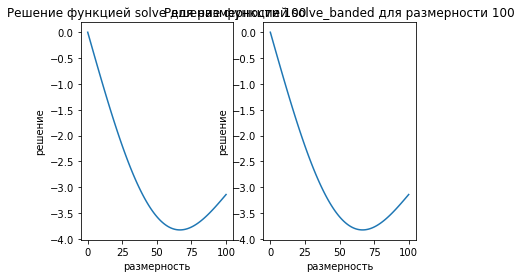



Время работы solve:  0.07720494270324707
Время работы solve_banded:  0.0


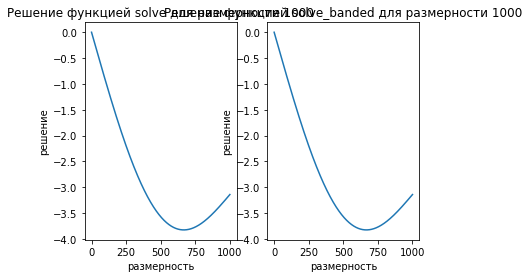



Время работы solve:  16.67178249359131
Время работы solve_banded:  0.0381014347076416


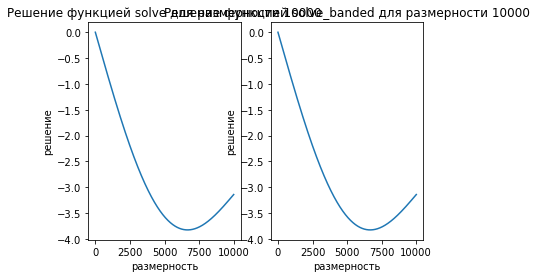



Невязка для функции solve между размерностями 100 и 10000 0.00026
Невязка для функции solve_banded между размерностями 100 и 10000 0.00026


Невязка для функции solve между размерностями 100 и 1000 0.00026
Невязка для функции solve_banded между размерностями 100 и 1000 0.00026


Невязка для функции solve между размерностями 1000 и 10000 3e-06
Невязка для функции solve_banded между размерностями 1000 и 10000 3e-06




In [16]:
task1_1()

Задание 1.2
Время работы solve:  0.002991199493408203
Время работы solve_banded:  0.011967658996582031


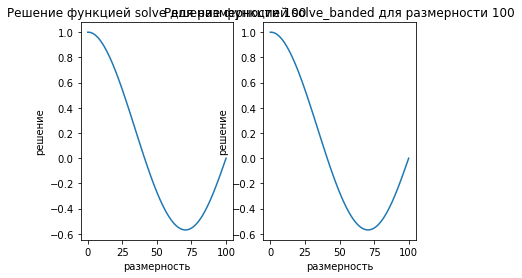



Время работы solve:  0.0629281997680664
Время работы solve_banded:  0.001993894577026367


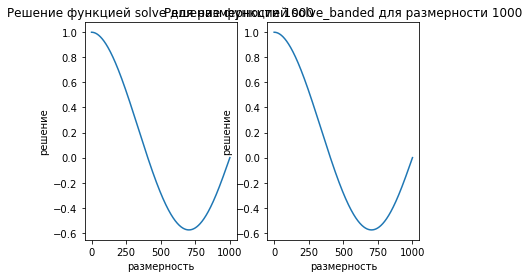

<ipython-input-10-cd5a3c673c50>:196: LinAlgWarning: Ill-conditioned matrix (rcond=1.39422e-19): result may not be accurate.
  res = lin.solve(A, F)


Время работы solve:  19.136873722076416
Время работы solve_banded:  0.02992701530456543


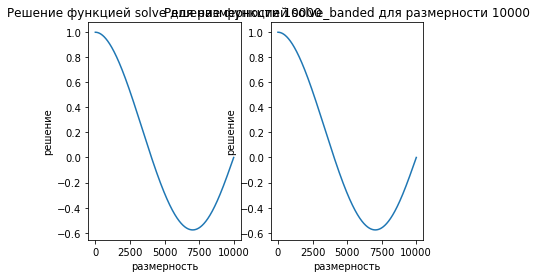



Невязка для функции solve между размерностями 100 и 10000 0.01788
Невязка для функции solve_banded между размерностями 100 и 10000 0.01787


Невязка для функции solve между размерностями 100 и 1000 0.01558
Невязка для функции solve_banded между размерностями 100 и 1000 0.01558


Невязка для функции solve между размерностями 1000 и 10000 0.002692
Невязка для функции solve_banded между размерностями 1000 и 10000 0.00266




In [17]:
task1_2()